LOAD DATA

In [1]:
import os
import pandas as pd
import numpy as np

# determine current working directory
cwd = os.getcwd()
print("CWD:", cwd)

# project root should be the credit card fraud detection folder
# if we're inside the notebook folder, go up one level
if os.path.basename(cwd).lower() == "notebook":
    project_root = os.path.abspath(os.path.join(cwd, ".."))
else:
    project_root = cwd
    if os.path.basename(project_root).lower() != "credit card fraud detection":
        project_root = os.path.join(project_root, "credit card fraud detection")

csv_path = os.path.join(project_root, "data", "creditcard.csv")

print("Loading from:", csv_path)

df = pd.read_csv(csv_path)

print(df.shape)
df.head()

CWD: c:\Users\KIIT0001\Desktop\projects\credit card fraud detection\notebook
Loading from: c:\Users\KIIT0001\Desktop\projects\credit card fraud detection\data\creditcard.csv
(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Checking Class Imbalance

In [2]:
df['Class'].value_counts(normalize=True)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

TRAIN-TEST SPLIT (Stratified because of imbalance)

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


Scale Amount Feature

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])


BASELINE MODEL (Logistic Regression)

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


C:\Users\KIIT0001\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[56825    39]
 [   12    86]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.88      0.77        98

    accuracy                           1.00     56962
   macro avg       0.84      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC Score:
0.9691768150000575


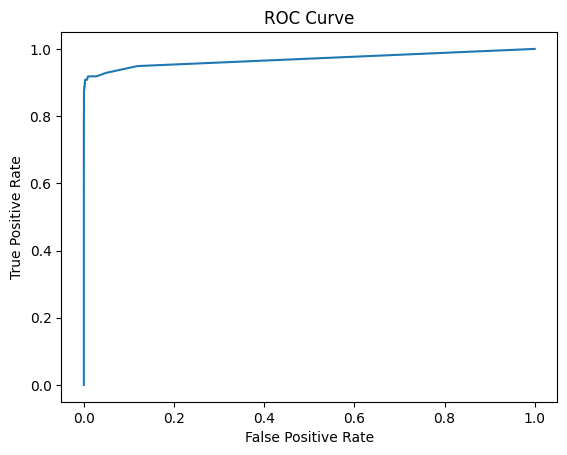

In [7]:
import os
import sys
import pandas as pd

# ensure src package is importable by adding project root to path
try:
    project_root
except NameError:
    cwd = os.getcwd()
    if os.path.basename(cwd).lower() == "notebook":
        project_root = os.path.abspath(os.path.join(cwd, ".."))
    else:
        project_root = cwd

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.preprocessing import split_data, scale_data, apply_smote
from src.model import train_random_forest
from src.evaluation import evaluate_model, plot_roc

# load data using project_root, not relative path
csv_path = os.path.join(project_root, "data", "creditcard.csv")
df = pd.read_csv(csv_path)

# Split
X_train, X_test, y_train, y_test = split_data(df)

# Scale
X_train, X_test = scale_data(X_train, X_test)

# Apply SMOTE
X_train_smote, y_train_smote = apply_smote(X_train, y_train)

# Train model
model = train_random_forest(X_train_smote, y_train_smote)

# Evaluate
evaluate_model(model, X_test, y_test, threshold=0.3)

# ROC
plot_roc(model, X_test, y_test)

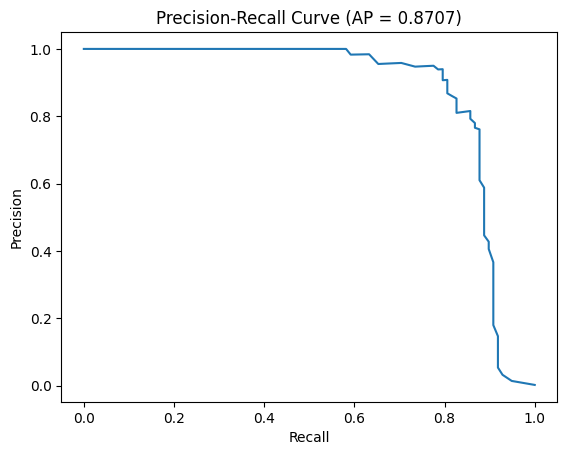

Best Threshold: 0.71
Best F1 Score: 0.8619
Confusion Matrix:
[[56859     5]
 [   20    78]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC Score:
0.9691768150000575
False Negatives (Missed Fraud): 20
False Positives (False Alerts): 5
Estimated Total Cost: 20250


In [8]:
from src.evaluation import plot_precision_recall, find_best_threshold, business_impact


# Precision-Recall Curve
plot_precision_recall(model, X_test, y_test)

# Optimal Threshold
best_threshold = find_best_threshold(model, X_test, y_test)

# Re-evaluate with best threshold
evaluate_model(model, X_test, y_test, threshold=best_threshold)

# Business Cost
business_impact(model, X_test, y_test, best_threshold)